# Computação Evolucionária
## Trabalho Prático 1
Amanda Kellen Soares de Pinho - 2017098188

Lucas Araujo Azevedo - 2017104188

# Questão 1
## a)

Para calcular a probabilidade temos que cada caracter da string alvo tenha `26+1` chances que cair corretamente (26 maiúsculas letras no alfabeto e maiúsculas, 1 caracter de espaço). Temos que para cada letra um total de 53  possíveis opções. Para que nossa frase seja exatamente igual na primeira tentativa temos a seguinte cáculo: 1/(53^28), sendo 28 a nossa quantidade de caracteres o que nos resulta em uma probabilidade de **1/4161536836220038342098551818958537752576** que é igual a **2.402958424629275e-40%**.

## b)

O algoritmo genético supera essa probabilidade por conta que ele corta o espaço de probabilidade de letras, então ele vai decrescendo essa probabilidade (ele vai evoluindo a cada interação), com essa diminuição do espaço possível para os caracteres ele converje mais rapidamente.

## c)

Para trabalhar com as letras mapearemos nosso univerço codificando cada letra um número.

In [1]:
import numpy as np
import pandas as pd
import random
import math

np.random.seed(42)

In [2]:
universo = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5,
            "F": 6, "G": 7, "H": 8, "I": 9, "J": 10,
            "K": 11, "L": 12, "M": 13, "N": 14, "O": 15,
            "P": 16, "Q": 17, "R": 18, "S": 19, "T": 20,
            "U": 21, "V": 22, "W": 23, "X": 24, "Y": 25, 
            "Z": 26, "*": 27}
inv_universo = {v: k for k, v in universo.items()}

In [3]:
def gen_individuo():
    return random.randint(1, 27)

# 1. Solução Candidata

Vamos gerar uma população de tamanho n definido pelo usuário para tentar chegar ao valor ótimo

## 1.1 Gera Frase

Primeiro criamos a função que gera a nossa frase

In [4]:
def gen_frase():
    frase = []
    num_frase = []
    for i in range(0, 27):
        frase.append(inv_universo[gen_individuo()])
        num_frase.append(gen_individuo())
    return frase, num_frase

def traduz_frase(num_frase):
    frase_trad = [inv_universo[x] for x in num_frase]
    return frase_trad

## 1.2 Gera população

Agora criamos a nossa função que gera a população:

In [5]:
def gen_pop(n):
    populacao = []
    for i in range(0, n):
        frase, num_frase = gen_frase()
        populacao.append(num_frase)
    return populacao

# 2. Função de Aptidão

A nossa função de aptidão será um calculo de distancia entre cada elemento da nossa lista, se o resultado dessa distancia for igual a 0, nossos elementos serão dados como iguais. Ao final retornamos a soma desses valores, quanto menor, mais igual será nossa frase

In [6]:
def calcula_distancia(num_objetivo, num_frase):
    list_dist = []
    for i in range(0, len(num_frase)):
        dist = (num_objetivo[i]-num_frase[i])/num_objetivo[i]
        list_dist.append(dist)
    return abs(sum(list_dist))

def menor_distancia(num_objetivo, list_frase):
    min_dist = 1000000000
    for i in list_frase:
        dist_atual = calcula_distancia(num_objetivo, i)
        if dist_atual < min_dist:
            min_dist = dist_atual
    return min_dist


def maior_distancia(num_objetivo, list_frase):
    max_dist = 0
    for i in list_frase:
        dist_atual = calcula_distancia(num_objetivo, i)
        if dist_atual > max_dist:
            max_dist = dist_atual
    return max_dist

# 3. Mecanismo de Seleção

# 3.1 Seleção dos pais

Retornamos os dois melhores indivíduos para realizar o cruzamento entre eles

In [7]:
def selection(num_objetivo, list_num_frases):
    "Retorna as duas melhores soluções (melhores fitness)"
    len_frase = len(list_num_frases)
    dist_1 = 1000000
    dist_2 = menor_distancia(num_objetivo, list_num_frases)
    position_1 = len_frase+1
    position_2 = len_frase+1

    for i, frase_atual in enumerate(list_num_frases):
        dist_frase = calcula_distancia(num_objetivo, frase_atual)
        if dist_frase ==  dist_2 and position_2 != i:
            position_2 = i
        elif dist_frase < dist_1:
            dist_1 = dist_frase
            position_1 = i
            
    melhores_2 = [list_num_frases[position_1],
                  list_num_frases[position_2]]
    return melhores_2

## 3.2 Seleção dos Sobreviventes

Para selecionar os sobreviventes, selecionamos os dois piores e os removemos da nossa lsita.

In [8]:
def replacement(num_objetivo, list_num_frases):
    "Retorna as duas melhores soluções (melhores fitness)"
    len_frase = len(list_num_frases)
    dist_1 = 0
    dist_2 = maior_distancia(num_objetivo, list_num_frases)
    position_1 = len_frase+1
    position_2 = len_frase+1

    for i, frase_atual in enumerate(list_num_frases):
        dist_frase = calcula_distancia(num_objetivo, frase_atual)
        if dist_frase ==  dist_2 and position_2 != i:
            position_2 = i
        elif dist_frase > dist_1 and i != position_2:
            dist_1 = dist_frase
            position_1 = i
    
    del list_num_frases[position_2]
    del list_num_frases[position_1]
    return list_num_frases

# Operadores de Variação

## Mutation

Na nossa função de mutation recebe a porcentagem de mutação e multiplica pelo tamanho da nossa frase (27) gerando uma nova amostra com a quantidade de intens solicitados

In [9]:
def mutation(mutation_rate, frase):
    size_mutation = int(mutation_rate*27)
    last_i = 0 # Variavel criada para realizar mutacoes em todas as partes
    quant_mutation = math.ceil(size_mutation/27)+1

    for i in range(1, quant_mutation+1):
        lim_sup = i*size_mutation
        
        size_of_mutation = len(frase[last_i:lim_sup])
        new_part = [gen_individuo() for x in range(0, size_of_mutation)] # Geracao de novos individuos
        
        distancia_inicial = abs(calcula_distancia(num_objetivo[last_i:lim_sup],
                                                  frase[last_i:lim_sup]))
        distancia_nova = abs(calcula_distancia(num_objetivo[last_i:lim_sup],
                                               new_part))
        if distancia_nova < distancia_inicial:
            frase[last_i:lim_sup] = new_part.copy()

    return frase

# Execução do algoritmo

In [10]:
objetivo = 'METHINKS*IT*IS*LIKE*A*WEASEL'
objetivo = ['M', 'E', 'T', 'H', 'I', 'N', 'K', 'S', '*', 
            'I', 'T', '*', 
            'I', 'S', '*', 
            'L', 'I', 'K', 'E', '*', 
            'A', '*', 
            'W', 'E', 'A', 'S', 'E', 'L']
num_objetivo = [universo[x] for x in objetivo]

In [55]:
tamanho_pop = 10
epocas = 1000
mutation_rate = 0.7
populacao = gen_pop(tamanho_pop)

list_results = []
list_epc = []
list_avg_resutls = []
best_result = menor_distancia(num_objetivo, populacao)
list_results.append(best_result)
list_avg_results.append(np.mean(list_results))

epc = 0
list_epc.append(epc)
while epc < epocas and best_result != 0:
    melhores_2 = selection(num_objetivo, populacao).copy() # Retorna os 2 melhores
    populacao = replacement(num_objetivo, populacao).copy() # Remove os 2 piores
    
    for frase_top in melhores_2:
        populacao.append(mutation(mutation_rate, frase_top))
    # lista_cross = cross_over(melhores_2)
    # list_num_frases.append(lista_cross[0])
    # list_num_frases.append(lista_cross[1])
    best_result = menor_distancia(num_objetivo, populacao)
    list_results.append(best_result)
    list_avg_results.append(np.mean(list_results))
    epc+=1    
    list_epc.append(epc)
    

In [56]:
print(list_results[-1])
str(traduz_frase(melhores_2[1]))

0.6955681385315253


"['H', 'G', 'D', 'Y', 'I', 'S', 'Q', 'G', 'Z', 'Q', 'H', 'G', 'I', 'V', 'B', 'B', 'E', 'U', 'E', 'X', 'A', 'E', 'C', 'C', 'B', 'U', 'N']"

Para nosso algoritmo funcionar, iremos trabalhar com um conceito de distância que consistirá em subtrair nosso valor da string real da nossa string gerada, quanto mais próximo o valor das string, mais próxima essa distância será de zero, sendo assim nosso algoritmo poderá ser otimizado.

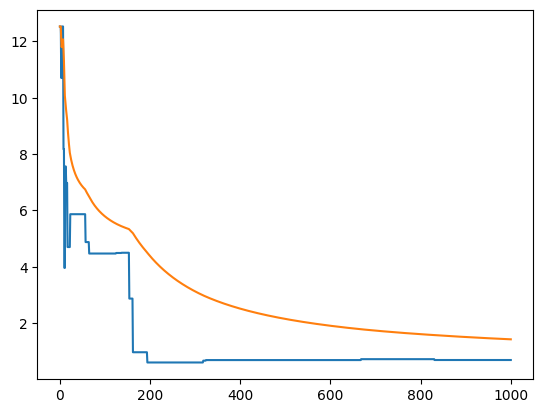

In [57]:
import matplotlib.pyplot as plt

plt.plot(list_epc, list_results)
plt.plot(list_epc, list_avg_results)
plt.show()